# Imports

In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
#Imports de base
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [3]:
#Import du fichier à analyser
PA75016_df = pd.read_csv("/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/data/pollution/2_Processed/PA75016.csv").copy()
df = PA75016_df[:-25]
df








,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4,NaN,NaN,75016 - Porte Auteuil,Traffic
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6,NaN,NaN,75016 - Porte Auteuil,Traffic
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1,NaN,NaN,75016 - Porte Auteuil,Traffic
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4,NaN,NaN,75016 - Porte Auteuil,Traffic


# EDA

In [4]:
from workflow.utils import analyse_df


In [5]:
#Analyse du fichier PA75016
analyse_df(PA75016_df)

General Info:
42576 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 2.60Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name', 'Station_type']


,PM25,PM10,NO2,O3,SO2
count,41250.000000,41426.000000,40760.000000,0.0,25444.000000
mean,15.097876,33.386702,73.221222,NaN,1.309079
std,8.904343,17.558344,29.106751,NaN,1.363716
min,0.000000,0.400000,5.100000,NaN,0.000000
25%,9.200000,21.025000,53.500000,NaN,0.200000
50%,13.000000,29.900000,71.100000,NaN,1.000000
75%,18.400000,41.800000,90.300000,NaN,2.000000
max,193.000000,253.000000,286.000000,NaN,75.900000



Cheking Missing Values:
Column "PM25" has 1326 missing values (3.11%)
Column "PM10" has 1150 missing values (2.70%)
Column "NO2" has 1816 missing values (4.27%)
Column "O3" has 42576 missing values (100.00%)
Column "SO2" has 17132 missing values (40.24%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.78


/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/workflow/utils.py:84: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


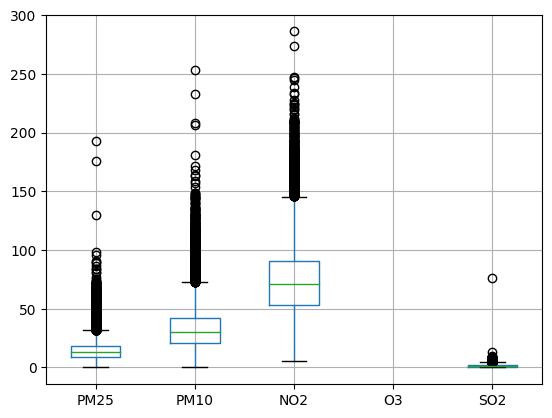

In [6]:
PA75016_df.boxplot();

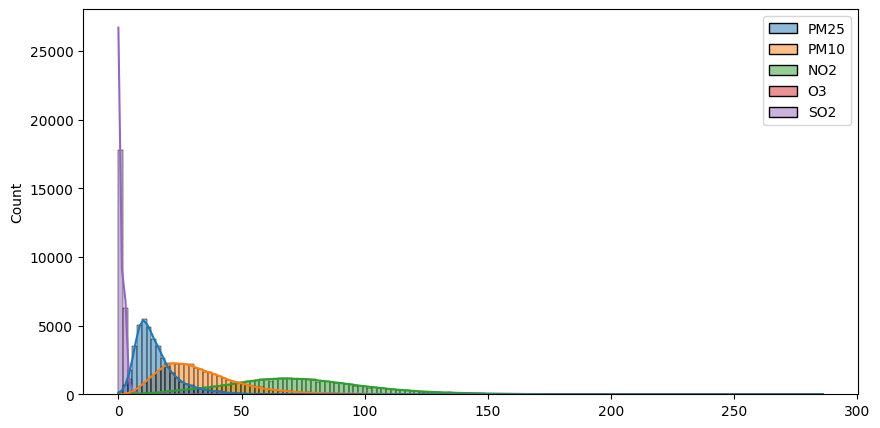

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data=PA75016_df,kde=True,bins=150)
plt.show()

## Conlusion de l'EDA

Synthèse de l'EDA sur la station PA75016:
- De 2018 à 2022, la part de NaN est faible pour les polluants suivants : PM25, PM10 & NO2 (<6% de NaN) --> **À garder.**
- Concernnant le SO2, la part de NaN est faible, progresse à partir de 2020, pour exploser en 2021, et atteindre 100% en 2022. -->  **À dropper.**
- Concernant l'O3, le nombre de NaN est à 100% de 2018 à 2022 --> **À dropper.**

# Preprocessing

In [8]:
## Drop des colonnes avec beaucoup de Nan
PA75016_df = PA75016_df.drop(columns=['O3', 'SO2', 'Station_name', 'Station_type'])
PA75016_df


,Date_time,PM25,PM10,NO2
0,2018/01/01 01:00:00+00,NaN,NaN,NaN
1,2018/01/01 02:00:00+00,NaN,NaN,NaN
2,2018/01/01 03:00:00+00,NaN,NaN,NaN
3,2018/01/01 04:00:00+00,NaN,NaN,NaN
4,2018/01/01 05:00:00+00,NaN,NaN,NaN
...,...,...,...,...
42571,2022/11/14 20:00:00+00,14.5,18.8,41.5
42572,2022/11/14 21:00:00+00,NaN,NaN,34.5
42573,2022/11/14 22:00:00+00,NaN,NaN,NaN
42574,2022/11/14 23:00:00+00,NaN,NaN,NaN


## X & y - SimpleImputer

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

num_features_normal = ['NO2']
num_features_skewed = ['PM25','PM10']

num_imputer_normal = make_pipeline(
    SimpleImputer(strategy='median'))

num_imputer_skewed = make_pipeline(
    SimpleImputer(strategy='median'))

preprocessor_imputer = make_column_transformer(
    (num_imputer_normal, num_features_normal),
    (num_imputer_skewed, num_features_skewed))

preprocessor_imputer


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['NO2']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['PM25', 'PM10'])])

In [10]:
PA75016_preprocessed = pd.DataFrame(preprocessor_imputer.fit_transform(PA75016_df))


In [11]:
PA75016_preprocessed = PA75016_preprocessed.rename(columns={0:"PM25",1:"PM10",2:"NO2"})
PA75016_preprocessed = PA75016_preprocessed.set_index(PA75016_df['Date_time'])


In [12]:
PA75016_preprocessed


,PM25,PM10,NO2
Date_time,,,
2018/01/01 01:00:00+00,71.1,13.0,29.9
2018/01/01 02:00:00+00,71.1,13.0,29.9
2018/01/01 03:00:00+00,71.1,13.0,29.9
2018/01/01 04:00:00+00,71.1,13.0,29.9
2018/01/01 05:00:00+00,71.1,13.0,29.9
...,...,...,...
2022/11/14 20:00:00+00,41.5,14.5,18.8
2022/11/14 21:00:00+00,34.5,13.0,29.9
2022/11/14 22:00:00+00,71.1,13.0,29.9


In [13]:
PA75016_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42576 entries, 2018/01/01 01:00:00+00 to 2022/11/15 00:00:00+00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    42576 non-null  float64
 1   PM10    42576 non-null  float64
 2   NO2     42576 non-null  float64
dtypes: float64(3)
memory usage: 1.3+ MB


## X & y - Passer Date_time d'un step horaire à un step journalier

In [14]:
from workflow.daily_basis import mean_max_categorical

PA75016_daily = mean_max_categorical(PA75016_preprocessed)


In [15]:
PA75016_daily



,Date_time,PM25,PM10,NO2
0,2018/01/01 01:00:00+00,71.1,13.0,29.9
1,2018/01/01 02:00:00+00,71.1,13.0,29.9
2,2018/01/01 03:00:00+00,71.1,13.0,29.9
3,2018/01/01 04:00:00+00,71.1,13.0,29.9
4,2018/01/01 05:00:00+00,71.1,13.0,29.9
...,...,...,...,...
42571,2022/11/14 20:00:00+00,41.5,14.5,18.8
42572,2022/11/14 21:00:00+00,34.5,13.0,29.9
42573,2022/11/14 22:00:00+00,71.1,13.0,29.9
42574,2022/11/14 23:00:00+00,71.1,13.0,29.9


## Obtenir y

In [16]:
from workflow.calcul_ATMO import general_categorical

PA75016_daily_cat = PA75016_daily.copy()
PA75016_daily_cat = general_categorical(PA75016_daily_cat)
PA75016_daily_cat
from workflow.calcul_ATMO import calcul_ATMO

PA75016_daily_cat = calcul_ATMO(PA75016_daily_cat)
PA75016_daily_cat




,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO
0,2018/01/01 01:00:00+00,71.1,13.0,29.9,4.0,0,0,4.0
1,2018/01/01 02:00:00+00,71.1,13.0,29.9,4.0,0,0,4.0
2,2018/01/01 03:00:00+00,71.1,13.0,29.9,4.0,0,0,4.0
3,2018/01/01 04:00:00+00,71.1,13.0,29.9,4.0,0,0,4.0
4,2018/01/01 05:00:00+00,71.1,13.0,29.9,4.0,0,0,4.0
...,...,...,...,...,...,...,...,...
42571,2022/11/14 20:00:00+00,41.5,14.5,18.8,3.0,0,0,3.0
42572,2022/11/14 21:00:00+00,34.5,13.0,29.9,3.0,0,0,3.0
42573,2022/11/14 22:00:00+00,71.1,13.0,29.9,4.0,0,0,4.0
42574,2022/11/14 23:00:00+00,71.1,13.0,29.9,4.0,0,0,4.0


In [17]:


PA75016_daily_cat["Date_time"]= pd.to_datetime(PA75016_daily_cat["Date_time"])
PA75016_daily_cat.dtypes
PA75016_daily_cat
PA75016_daily_cat["year"] = PA75016_daily_cat["Date_time"].dt.year
PA75016_daily_cat["week"] = PA75016_daily_cat["Date_time"].dt.week
PA75016_daily_cat["day"] = PA75016_daily_cat["Date_time"].dt.day
PA75016_daily_cat["month"] = PA75016_daily_cat["Date_time"].dt.month
PA75016_daily_cat["weekday_name"] = PA75016_daily_cat["Date_time"].dt.day_of_week


PA75016_daily_cat["weekday_name"].unique()



#Ici on veut grouper les colonnes de 2018 par semaine et extraire la med

df_all_year = PA75016_daily_cat.groupby(by=["year","week"],as_index=False).mean()









#df_all_year





/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_1615/3139527643.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  PA75016_daily_cat["week"] = PA75016_daily_cat["Date_time"].dt.week
/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_1615/3139527643.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all_year = PA75016_daily_cat.groupby(by=["year","week"],as_index=False).mean()


In [18]:
df_all_month = PA75016_daily_cat.groupby(by=["year","month"],as_index=False).mean()

df_all_month
    
    
    

/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_1615/1512528829.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all_month = PA75016_daily_cat.groupby(by=["year","month"],as_index=False).mean()


,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,weekday_name
0,2018,1,76.924226,15.095155,30.851009,4.256098,0.211306,0.160162,4.230148,2.744280,16.020188,2.810229
1,2018,2,93.399851,23.746429,46.469940,4.678248,0.668155,0.626488,4.617560,6.928571,14.500000,3.000000
2,2018,3,93.063575,18.119892,39.468280,4.704607,0.365591,0.443548,4.674731,11.129032,16.000000,3.096774
3,2018,4,89.836806,15.194306,41.718750,4.590652,0.202778,0.488889,4.508333,15.500000,15.500000,3.000000
4,2018,5,88.965054,18.447849,44.192339,4.622101,0.362903,0.560484,4.559140,19.870968,16.000000,2.903226
5,2018,6,89.658889,17.202500,40.162917,4.613221,0.286111,0.484722,4.562500,24.200000,15.500000,3.100000
6,2018,7,103.716532,16.052554,44.491263,4.695122,0.241935,0.572581,4.659946,28.580645,16.000000,2.935484
7,2018,8,79.479435,12.781989,36.660349,4.260573,0.094086,0.336022,4.200269,33.000000,16.000000,3.000000
8,2018,9,91.754444,15.896250,38.996250,4.599432,0.220833,0.391667,4.500000,37.333333,15.500000,3.166667
9,2018,10,83.501747,18.714516,40.577688,4.526676,0.385753,0.455645,4.454301,41.741935,16.000000,2.806452


In [19]:
df_all_month[df_all_month["month"] == 1]


,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,weekday_name
0,2018,1,76.924226,15.095155,30.851009,4.256098,0.211306,0.160162,4.230148,2.744280,16.020188,2.810229
12,2019,1,85.196371,19.085081,37.641398,4.561828,0.432796,0.419355,4.561828,2.870968,16.000000,2.903226
24,2020,1,67.352285,17.884543,35.344086,4.030914,0.379032,0.349462,4.030914,3.000000,16.000000,3.000000
36,2021,1,64.230376,18.518548,32.135887,3.931267,0.431452,0.307796,3.922043,7.387097,16.000000,3.193548
48,2022,1,67.456183,20.881048,39.613844,4.068548,0.556452,0.448925,4.068548,5.774194,16.000000,3.064516


In [20]:
import calendar
df_all_month['month'] = df_all_month['month'].apply(lambda x: calendar.month_abbr[x])




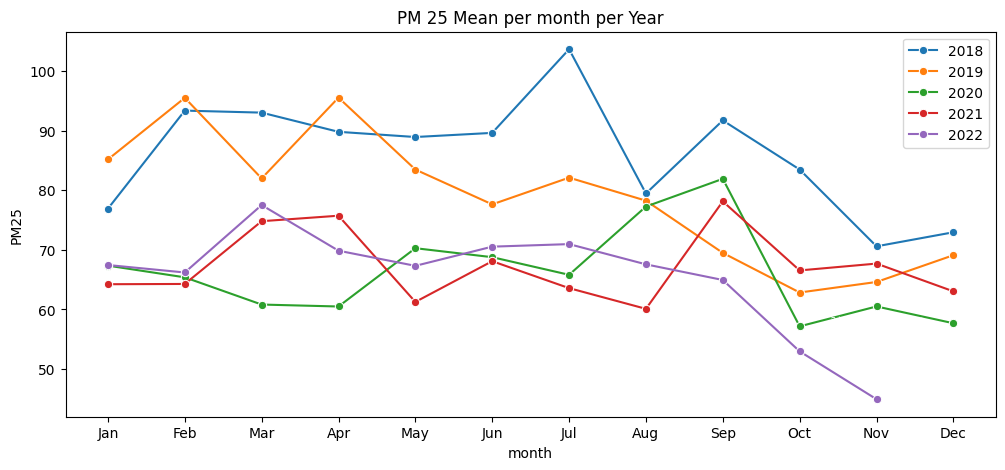

In [21]:
#df_all_month = PA75016_daily_cat.groupby(by=["year","month"]as_index=False).mean()
#df_all_month


import seaborn as sns 
#On veut plotter une année uniquement 
#Ensuite on veut plotter toutes les années sur un plot 

plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


ax1 = sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[:12],
             marker = "o",label="2018")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[12:24],
             marker = "o",label="2019")

sns.lineplot(x = "month", y ="PM25", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[36:48],
             marker = "o",label="2021")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[48:59],
             marker = "o",label="2022").set_title("PM 25 Mean per month per Year")




ax1.text("Apr",58,"1er Confinement", 
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment


ax1.text("Nov",58,"2ème Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.text("May",58,"3ème Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "top") # Vertical alignment





plt.show()










#Ajout d'un marqueur de confinement



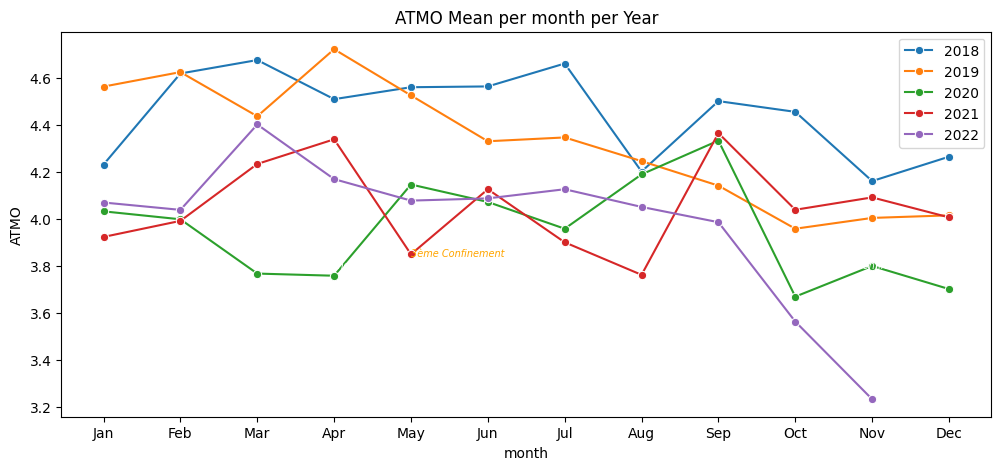

In [22]:
plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


ax1 = sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[:12],
                   
             marker = "o",label="2018")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             
             marker = "o",label="2019")

sns.lineplot(x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             
             marker = "o",label="2020")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             
             marker = "o",label="2021")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             
             marker = "o",label="2022").set_title("ATMO Mean per month per Year")



ax1.text("Apr",3.8,"1er Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
         
         
         
       va = "center") # Vertical alignment


ax1.text("Nov",3.8,"2ème Confinement", 
         
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
       color = "white",          # Color
         
         
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.text("May",3.85,"3ème Confinement", 
         
         
 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "orange",          # Color
         
       ha = "left", # Horizontal alignment
         
         
         
       va = "center") # Vertical alignment


plt.show()




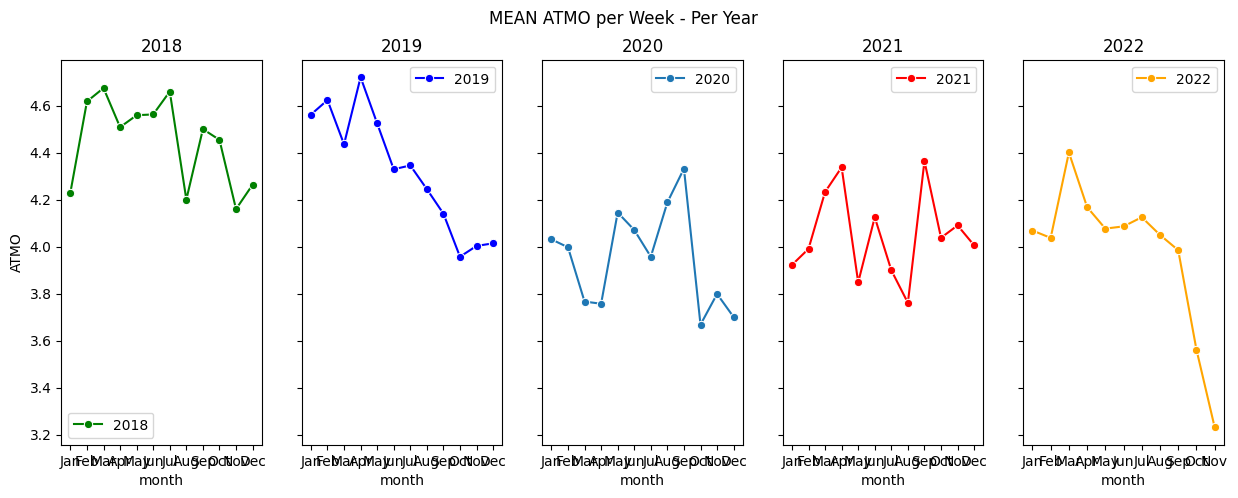

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")
axes[0].set_title("2018")



# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange").set_title("ATMO Mean per Week per Year")

axes[4].set_title("2022")




#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()







In [24]:
df_mean_year = PA75016_daily_cat.groupby(by=["year"],as_index=False).mean()
df_mean_year



/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_1615/1966568787.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_year = PA75016_daily_cat.groupby(by=["year"],as_index=False).mean()


,year,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,month,weekday_name
0,2018,86.104064,17.196769,39.074392,4.496707,0.313963,0.426647,4.447996,26.433040,15.722229,6.526658,2.992122
1,2019,78.815585,15.639975,35.864088,4.329416,0.266114,0.349102,4.325391,26.251266,15.688191,6.486073,2.978361
2,2020,66.104804,12.761270,29.879429,3.953287,0.141393,0.207878,3.950250,26.928962,15.756831,6.513661,2.997268
3,2021,67.277824,14.760388,31.019215,4.054949,0.205808,0.228650,4.049931,26.691460,15.754591,6.550964,3.010790
4,2022,66.538753,14.782039,30.253164,4.023344,0.208830,0.209747,4.019389,23.257697,15.352155,5.767981,3.006026


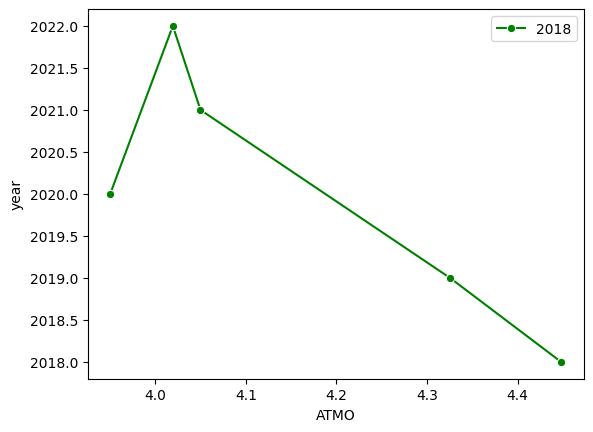

In [25]:
sns.lineplot( x = "ATMO", y = "year", data=df_mean_year.iloc[0:12],
             
             
             
             
             marker = "o",label="2018",color = "green")
plt.show()












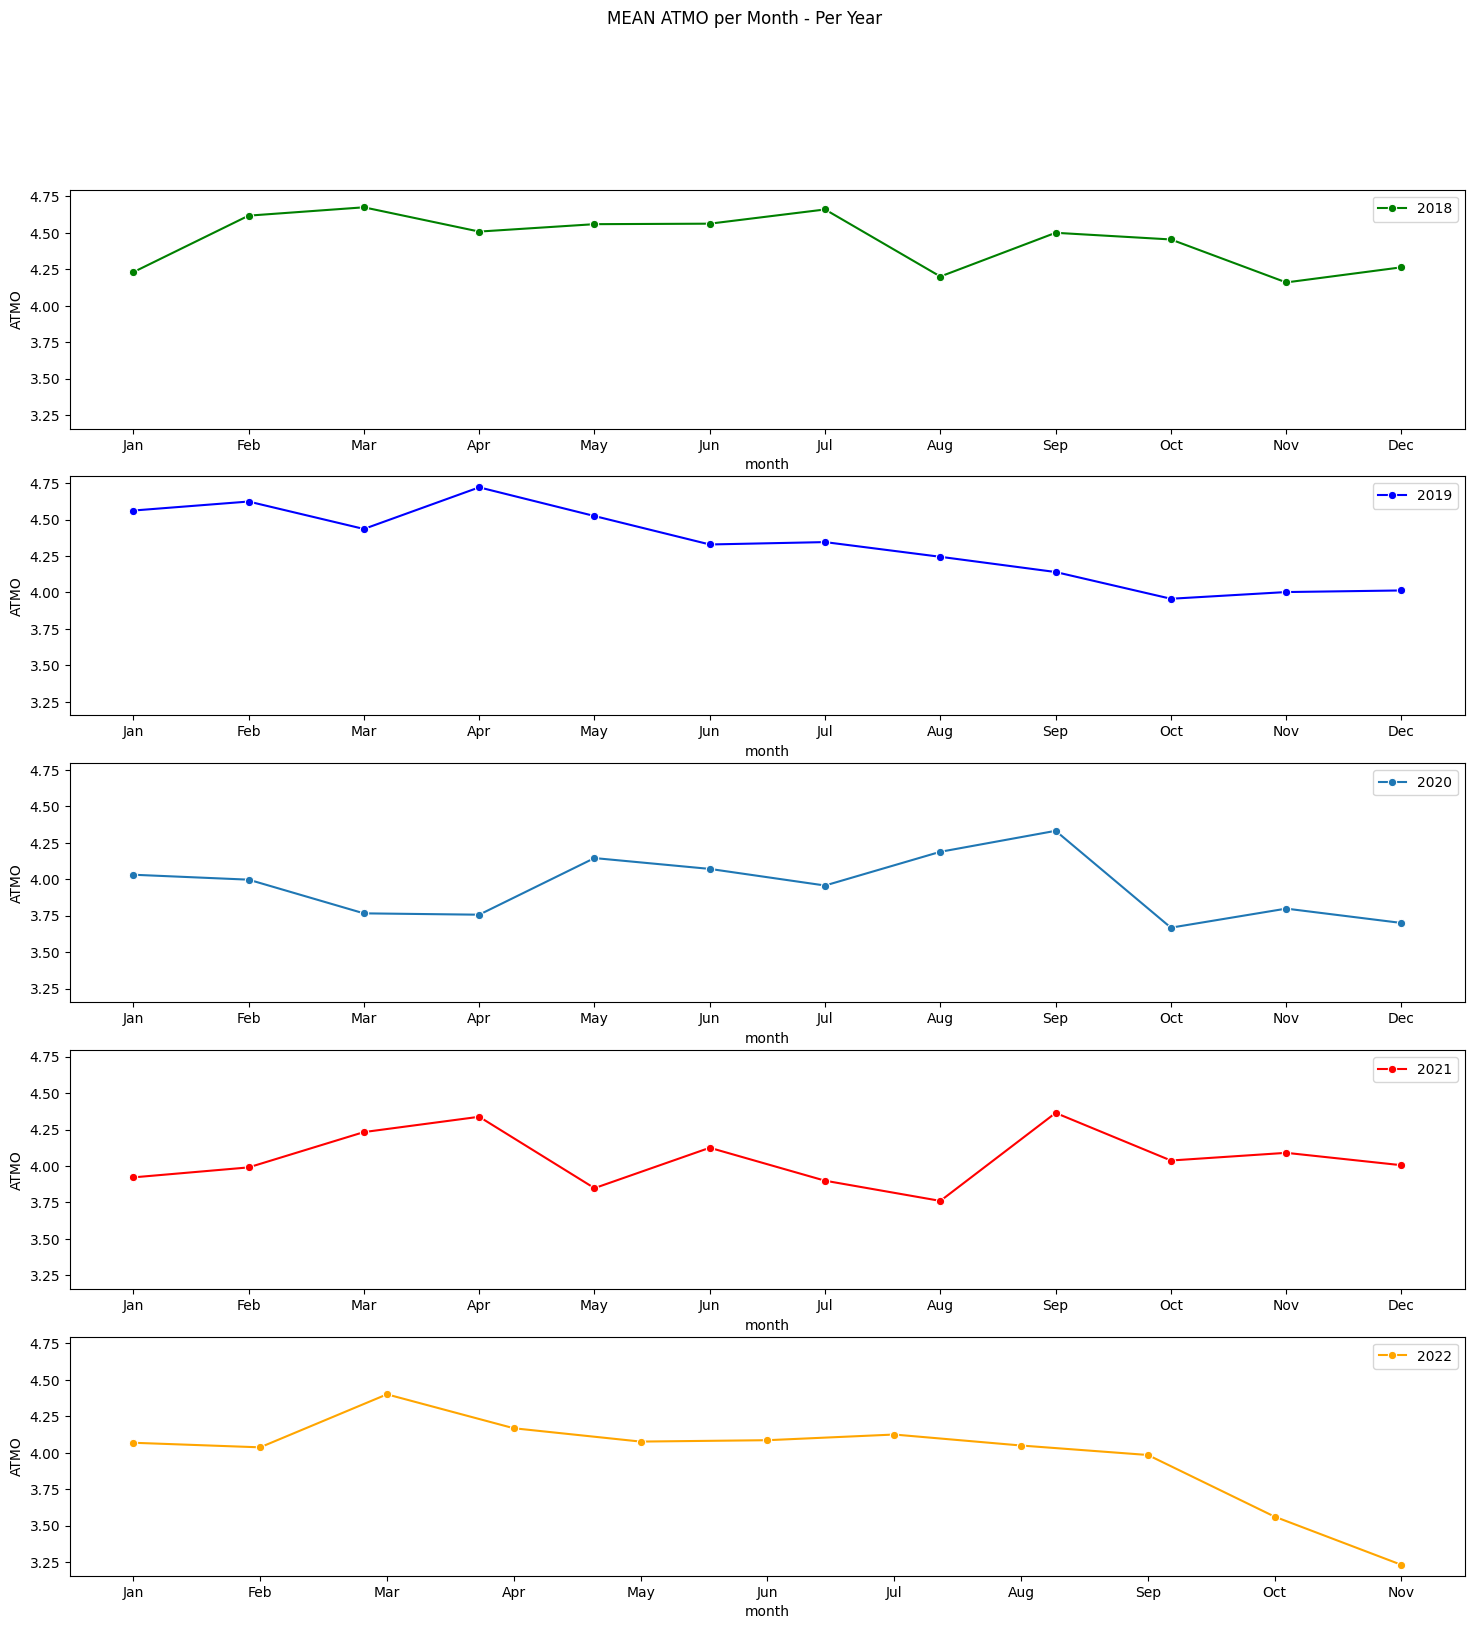

In [26]:
fig, axes = plt.subplots(5, 1, figsize=(18, 18), sharey=True)





fig.suptitle('MEAN ATMO per Month - Per Year')


# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")
#axes[0].set_title("2018")

#sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
            # marker = "o",label="2018",color = "green")
    



    



# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")





#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()

In [27]:
df_all_month[:]

,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,weekday_name
0,2018,Jan,76.924226,15.095155,30.851009,4.256098,0.211306,0.160162,4.230148,2.744280,16.020188,2.810229
1,2018,Feb,93.399851,23.746429,46.469940,4.678248,0.668155,0.626488,4.617560,6.928571,14.500000,3.000000
2,2018,Mar,93.063575,18.119892,39.468280,4.704607,0.365591,0.443548,4.674731,11.129032,16.000000,3.096774
3,2018,Apr,89.836806,15.194306,41.718750,4.590652,0.202778,0.488889,4.508333,15.500000,15.500000,3.000000
4,2018,May,88.965054,18.447849,44.192339,4.622101,0.362903,0.560484,4.559140,19.870968,16.000000,2.903226
5,2018,Jun,89.658889,17.202500,40.162917,4.613221,0.286111,0.484722,4.562500,24.200000,15.500000,3.100000
6,2018,Jul,103.716532,16.052554,44.491263,4.695122,0.241935,0.572581,4.659946,28.580645,16.000000,2.935484
7,2018,Aug,79.479435,12.781989,36.660349,4.260573,0.094086,0.336022,4.200269,33.000000,16.000000,3.000000
8,2018,Sep,91.754444,15.896250,38.996250,4.599432,0.220833,0.391667,4.500000,37.333333,15.500000,3.166667
9,2018,Oct,83.501747,18.714516,40.577688,4.526676,0.385753,0.455645,4.454301,41.741935,16.000000,2.806452


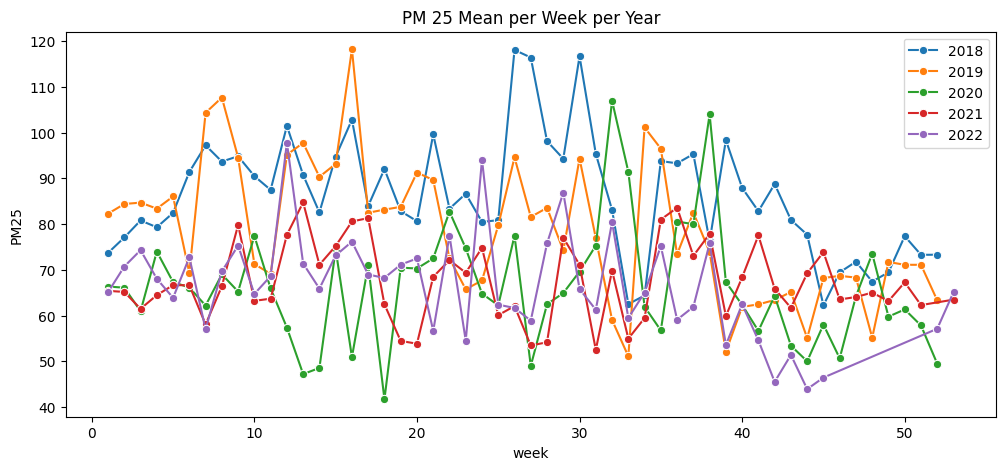

In [28]:
import seaborn as sns 
#On veut plotter une année uniquement 
#Ensuite on veut plotter toutes les années sur un plot 

plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')






sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[:52],
             marker = "o",label="2018")




sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[52:104],
             marker = "o",label="2019")

sns.lineplot(x = "week", y ="PM25", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")

sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[156:208],
             marker = "o",label="2021")

sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[208:255],
             marker = "o",label="2022").set_title("PM 25 Mean per Week per Year")

plt.show()























In [29]:
df_all_year



,year,week,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,day,month,weekday_name
0,2018,1,73.696335,15.146597,30.637696,4.089005,0.167539,0.089005,4.089005,7.408377,2.382199,2.638743
1,2018,2,77.072024,25.027976,44.335714,4.373494,0.750000,0.577381,4.333333,11.000000,1.000000,3.000000
2,2018,3,80.786310,10.699405,23.451786,4.415663,0.011905,0.017857,4.363095,18.000000,1.000000,3.000000
3,2018,4,79.304762,11.368452,26.629762,4.244048,0.005952,0.023810,4.244048,25.000000,1.000000,3.000000
4,2018,5,82.450000,12.760119,29.157738,4.472393,0.029762,0.136905,4.339286,14.285714,1.571429,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
252,2022,43,51.405357,13.020238,26.989286,3.500000,0.089286,0.065476,3.500000,27.000000,10.000000,3.000000
253,2022,44,43.936905,10.536905,20.369643,3.160714,0.005952,0.000000,3.160714,7.428571,10.857143,3.000000
254,2022,45,46.451190,14.339286,23.975000,3.327381,0.208333,0.077381,3.327381,10.000000,11.000000,3.000000
255,2022,46,40.304000,14.308000,24.664000,3.080000,0.040000,0.000000,3.080000,14.040000,11.000000,0.040000


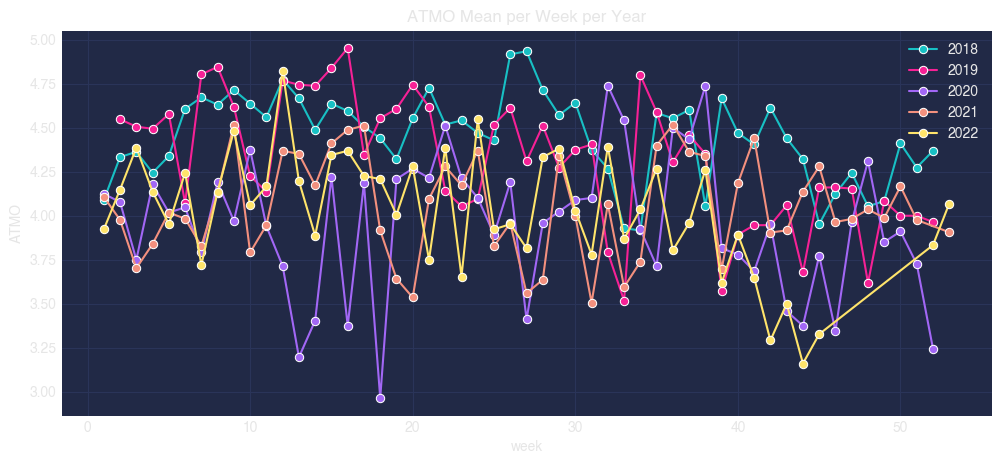

In [30]:

plt.figure(figsize=(12,5))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')







sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018")




sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019")

sns.lineplot(x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")

sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021")

sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022").set_title("ATMO Mean per Week per Year")

plt.show()






In [31]:
f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(13,3))


sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018") ax1.set_title("ATMO Mean per Week in 2018")ax[0]



#ax2.sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             #marker = "o",label="2019"); ax2.set_title("Multiplicative Model Residuals");

    
    

    

SyntaxError: invalid syntax (912250516.py, line 5)

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018",color = "green")
axes[0].set_title("2018")



# 2019
sns.lineplot(ax=axes[1],x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019",color="b")


axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")
axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021",color="r")

axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022",color="orange").set_title("ATMO Mean per Week per Year")

axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()












In [ ]:
df_mean_year



In [ ]:
plt.plot([0,df_mean_year["ATMO"][0] ], [0,df_mean_year["ATMO"][0]], linewidth=2)
plt.show







In [ ]:
import matplotlib.pyplot as plt
plt.axline(xy1=(0,0),xy2=(0,df_mean_year["ATMO"][0]))
plt.show;







           
    
           
           




In [ ]:
plt.plot([0,2], [0,4], linewidth=2)

plt.show;




In [ ]:
sns.lineplot(ax=axes[0], x ="year" , y = "ATMO", data=df_mean_year.iloc[:52],
             marker = "o",label="Mean 2018",color = "green")


In [ ]:
df_all_year


In [ ]:
import numpy as np


fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharey=True)




fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018",color = "green")


#on veut tracer une ligne droite qui prend en y l'ATMO moyen de l'année 

#sns.lineplot(ax=axes[0], x = , y = "ATMO", data=df_mean_year.iloc[:52],marker = "o",label="Mean 2018",color = "green")





#axes[0].set_title("2018")





# 2019
sns.lineplot(ax=axes[1],x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()










In [ ]:
import numpy as np


fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharey=True)




fig.suptitle('MEAN ATMO per Month - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")


#on veut tracer une ligne droite qui prend en y l'ATMO moyen de l'année 

#sns.lineplot(ax=axes[0], x = , y = "ATMO", data=df_mean_month.iloc[:52],marker = "o",label="Mean 2018",color = "green")




#axes[0].set_title("2018")





# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()













In [ ]:
PA75016_daily_cat.head(10)




In [ ]:
df_days




In [ ]:
#import calendar
df_days_1 = PA75016_daily_cat.copy()
df_days_1['weekday_name'] = df_days_1['weekday_name'].apply(lambda x: calendar.day_name[x])
df_days_1









In [ ]:
PA75016_daily_cat



In [ ]:
PA75016_daily_cat




In [ ]:
df_days_1 =  df_days_1.groupby(by=['weekday_name'],as_index=False).mean()
df_days_1



df_days_1.sort_values(by=['weekday_name'])










#On veut La moyenne de chaque jour de la semaine 
#il faut donc faire une fonction qui permet de transcrire que le jour de la semaine 


In [ ]:
sns.barplot(data=df_days,x="weekday_name",y="ATMO")




plt.show()










In [ ]:
sns.barplot(data=df_days,x="weekday_name",y="PM25")








plt.show()

In [ ]:
PA75016_daily_cat



In [ ]:
from workflow.data_viz import data_viz

data_viz(PA75016_daily_cat)












In [ ]:
df_all_day = PA75016_daily_cat.groupby(by=["day","year"],as_index=False).mean()

df_all_day






In [ ]:
PA75016_daily_cat



In [ ]:
df_all_day[df_all_day["year"]==2018]



In [ ]:
PA75016_daily_cat[:365]


                  
    
    

In [ ]:

plt.figure(figsize=(20,10))



plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


fig.suptitle('MEAN PM25 per Month - Per Year')


# 2018
sns.lineplot( x = "Date_time", y = "PM25", data=PA75016_daily_cat[:365],
             
             
             marker = "o",label="2018",color = "green")

plt.show()







In [ ]:
plt.figure(figsize=(20,10))



plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


fig.suptitle('MEAN PM25 per Month - Per Year')


# 2018
sns.lineplot( x = "Date_time", y = "PM25", data=PA75016_daily_cat[366:729],
             
             
             
             marker = "o",label="2018",color = "red")



plt.show()




In [ ]:
import numpy as np



In [ ]:
df_test = PA75016_daily_cat[["PM25","Date_time"]]
df_test




In [ ]:
df_test["J-1"] = df_test["PM25"].shift(1)
df_test["J-2"] = df_test["PM25"].shift(2)
df_test["J-3"] = df_test["PM25"].shift(3)
df_test["J-4"] = df_test["PM25"].shift(4)
df_test["J-5"] = df_test["PM25"].shift(5)
df_test["J-6"] = df_test["PM25"].shift(6)
df_test["J-7"] = df_test["PM25"].shift(7)


#df_test["mean shift"] = df_test[["J-1","J-2","J-3","J-4","J-5","J-6","J-7"]].mean()
df_test



#PA75016_daily_cat = PA75016_daily_cat.dropna()
#PA75016_daily_cat














In [ ]:
df_test = df_test.dropna()
df_test







In [ ]:
df_test["mean_shift"]=df_test[["J-1","J-2","J-3","J-4","J-5","J-6","J-7"]].mean(axis=1)
df_test








In [ ]:
plt.figure(figsize=(20,10))




plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


fig.suptitle('MEAN PM25 per Month - Per Year')


# 2018
sns.lineplot( x = "Date_time", y = "mean_shift", data=df_test[0:120],
             
             
             
             marker = "o",label="2018",color = "red")


plt.show()





In [ ]:
plt.figure(figsize=(20,10))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

fig.suptitle('MEAN PM25 per day')

# 2018
sns.lineplot( x = "Date_time", y = "mean_shift", data=df_test[730:1095],

             marker = "o",label="2020",color = "blue")
plt.show()




In [ ]:
plt.figure(figsize=(20,10))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

fig.suptitle('MEAN PM25 per day')


sns.lineplot( x = "Date_time", y = "mean_shift", data=df_test[0:120],marker = "o",label="2018",color = "red")

# 2018




plt.show()


In [ ]:
df_ref.dtypes





In [ ]:
df_ref["Month-Day"]=df_ref.Date_time.map(lambda x: x.strftime('%m-%d'))
df_ref
df_ref_3 = df_ref.groupby(by="Month-Day",as_index=False).mean()





In [ ]:
df_ref['MonthDay'] = df_ref['Date_time'].map(lambda x: 10*x.month + x.day)


df_ref.head(25)








In [ ]:
import datetime as dt
df_ref = df_test.copy()
df_ref



# on veut créer 3 colonnes qui est la moyenne de l'année

#On veut créer une année fictive qui est en fait la moyenne des autres années
#On veut créer 
#Puis on plot cette année fictive : 


#et on regarde les pics de pollution 

df_ref["Date_time_2"]= df_ref["Date_time"].astype(str)

df_ref["day"]= df_ref["Date_time"].dt.day

df_ref["month"]= df_ref["Date_time"].dt.month



df_ref_2 = df_ref.groupby(by=["month","day"],as_index=False).mean()
df_ref















In [ ]:
plt.figure(figsize=(20,10))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

fig.suptitle('MEAN PM25 per day')

# 2018
sns.lineplot( x = "Month-Day", y = "mean_shift", data=df_ref_3,
             marker = "o",label="Année fictive",color = "blue")
plt.show()









In [ ]:
#Maintenant il faut qu'on définisse une règle pour indiquer l'encodage que notre modèle va suivre 
# Notre règle va être basé sur 80 

In [ ]:
def encoder(x):
    if x > 80:
        return 1
    else:
        
        return 0

In [ ]:
#Encoding 

df_test["Pollution_peak"] = df_test["mean_shift"]
df_test["Pollution_peak"] = df_test["mean_shift"].apply(encoder)
df_test[df_test["Pollution_peak"] == 1]








In [ ]:
from workflow.data_viz import data_viz
from workflow.preprocessing import preprocess_without_scaling

%load_ext autoreload
%autoreload 2

import pandas as pd 

df_13 = pd.read_csv("../../data/pollution/2_Processed/PA75013.csv").copy()
df_13




df_13_preprocessed_w_scaling = preprocess_without_scaling(df_13)
df_13_preprocessed_w_scaling

data_viz_test = data_viz(df_13_preprocessed_w_scaling)
data_viz_test









In [ ]:
from workflow.data_viz import plot_pollutant_v1
from workflow.data_viz import plot_pollutant_v2


plot_pollutant_v2(data_viz_test,"O3","week")
















In [ ]:
df



In [32]:
#df['Date_time'] = df['Date_time'].astype(str).str[0:10].copy()


#df.loc["Date_time"]
df.reset_index()

df.loc[:]["Date_time"] = df.loc[:]['Date_time'][0:10].copy() 
df 













                            
                                  
                        











,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4,NaN,NaN,75016 - Porte Auteuil,Traffic
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6,NaN,NaN,75016 - Porte Auteuil,Traffic
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1,NaN,NaN,75016 - Porte Auteuil,Traffic
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4,NaN,NaN,75016 - Porte Auteuil,Traffic


In [ ]:
df.Date_time.astype(str).str[:10]















In [51]:
df


,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42546,2022/11/13,18.5,18.2,35.4,NaN,NaN,75016 - Porte Auteuil,Traffic
42547,2022/11/13,18.8,21.8,29.6,NaN,NaN,75016 - Porte Auteuil,Traffic
42548,2022/11/13,19.4,29.9,32.1,NaN,NaN,75016 - Porte Auteuil,Traffic
42549,2022/11/13,22.8,23.2,29.4,NaN,NaN,75016 - Porte Auteuil,Traffic


In [85]:


from workflow.preprocessing import preprocess_without_scaling
from workflow.preprocessing import preprocess

#Voir pourquoi l'imputer ne fonctionne pas ici

df_preprocessed_1= preprocess_without_scaling(df)





df_preprocessed_1































You have dropped O3 with 100.0% of NA
You have dropped SO2 with 40.17% of NA
            PM25  PM10   NO2
Date_time                   
2018/01/01  13.0  29.9  71.1
2018/01/01  13.0  29.9  71.1
2018/01/01  13.0  29.9  71.1
2018/01/01  13.0  29.9  71.1
2018/01/01  13.0  29.9  71.1
...          ...   ...   ...
2022/11/12  38.1  82.2  97.0
2022/11/12  34.8  69.2  83.8
2022/11/12  44.3  64.6  82.8
2022/11/12  52.1  71.0  75.1
2022/11/12  49.3  68.2  70.2

[42526 rows x 3 columns]
You have processed the dataframe without scaling it, now you can play with data viz functions 


,Date_time,PM25,PM10,NO2,ATMO
0,2018/01/01,13.00,29.90,71.1,0
1,2018/01/02,13.00,29.90,71.1,0
2,2018/01/03,13.00,29.90,71.1,0
3,2018/01/04,13.00,29.90,71.1,0
4,2018/01/05,12.83,28.54,71.1,0
...,...,...,...,...,...
1769,2022/11/08,8.66,17.95,62.4,0
1770,2022/11/09,9.46,20.89,84.7,0
1771,2022/11/10,13.10,24.36,86.4,0
1772,2022/11/11,10.79,15.25,52.5,0


In [41]:
df["Date_time"] = df['Date_time'].astype(str).str[0:10].copy()

df





,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42546,2022/11/13,18.5,18.2,35.4,NaN,NaN,75016 - Porte Auteuil,Traffic
42547,2022/11/13,18.8,21.8,29.6,NaN,NaN,75016 - Porte Auteuil,Traffic
42548,2022/11/13,19.4,29.9,32.1,NaN,NaN,75016 - Porte Auteuil,Traffic
42549,2022/11/13,22.8,23.2,29.4,NaN,NaN,75016 - Porte Auteuil,Traffic
